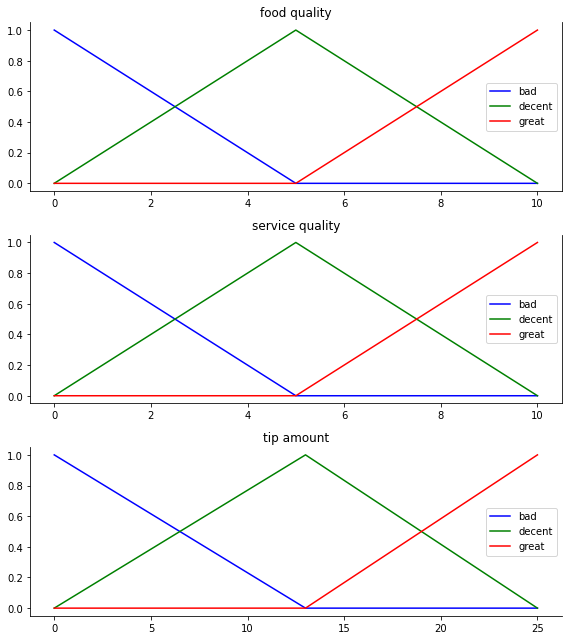

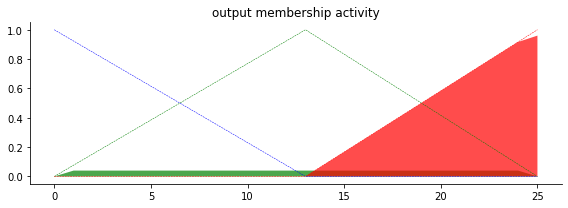

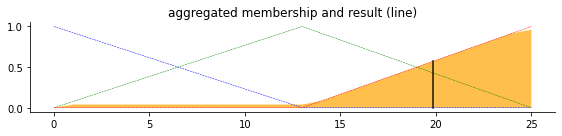

In [30]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# start, stop, step
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# chart kualitas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

# chart service
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

# chart tip
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# visualisasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth = 1.5, label = 'bad')
ax0.plot(x_qual, qual_md, 'g', linewidth = 1.5, label = 'decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth = 1.5, label = 'great')
ax0.set_title("food quality")
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth = 1.5, label = 'bad')
ax1.plot(x_serv, serv_md, 'g', linewidth = 1.5, label = 'decent')
ax1.plot(x_serv, serv_hi, 'r', linewidth = 1.5, label = 'great')
ax1.set_title("service quality")
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth = 1.5, label = 'bad')
ax2.plot(x_tip, tip_md, 'g', linewidth = 1.5, label = 'decent')
ax2.plot(x_tip, tip_hi, 'r', linewidth = 1.5, label = 'great')
ax2.set_title("tip amount")
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.tight_layout()

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

tip_activation_lo = np.fmin(active_rule1, tip_lo)

tip_activation_md = np.fmin(serv_level_md, tip_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

fig, ax0 = plt.subplots(figsize = (8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor = 'b', alpha = 0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth = 0.5, linestyle = '--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor = 'g', alpha = 0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth = 0.5, linestyle = '--', )
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor = 'r', alpha = 0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth = 0.5, linestyle = '--', )
ax0.set_title("output membership activity")

for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.tight_layout()

aggregated = np.fmax(tip_activation_lo,
    np.fmax(tip_activation_md, tip_activation_hi))

tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)

fig, ax0 = plt.subplots(figsize=(8,2))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('aggregated membership and result (line)')

for ax in (ax0, ):
    ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.tight_layout()
